<a href="https://colab.research.google.com/github/palashscripts/EXCEL-ASSIGNMENT-SET-3/blob/main/Stock_Price_Analysis_and_Forecasting_Using_LSTM_A_Data_Driven_Approach1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

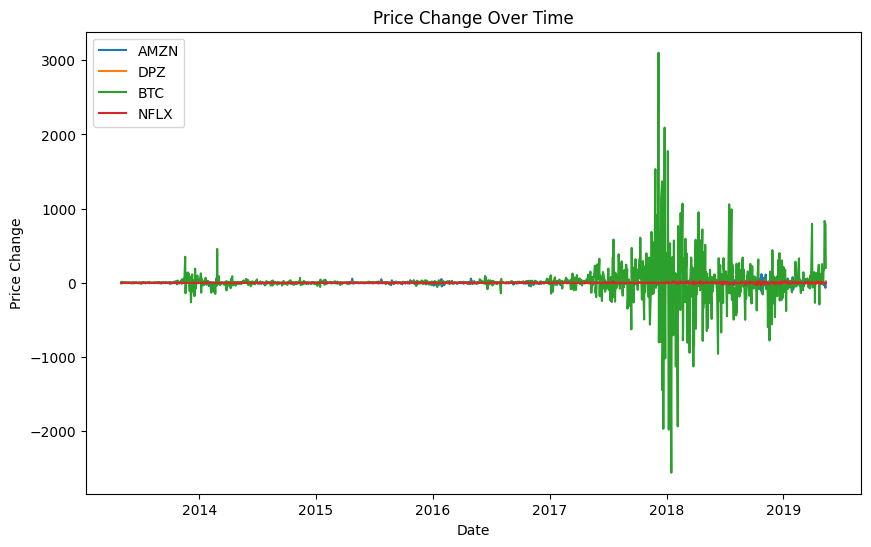

In [3]:
#1. Change in Stock Price Over Time (with Graph)

import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
file_path = '/content/portfolio_data.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the price change over time
price_change = data.set_index('Date').diff()

# Plot the price change over time for each stock
plt.figure(figsize=(10,6))
for stock in price_change.columns:
    plt.plot(price_change.index, price_change[stock], label=stock)
plt.title('Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.legend(loc='upper left')
plt.show()


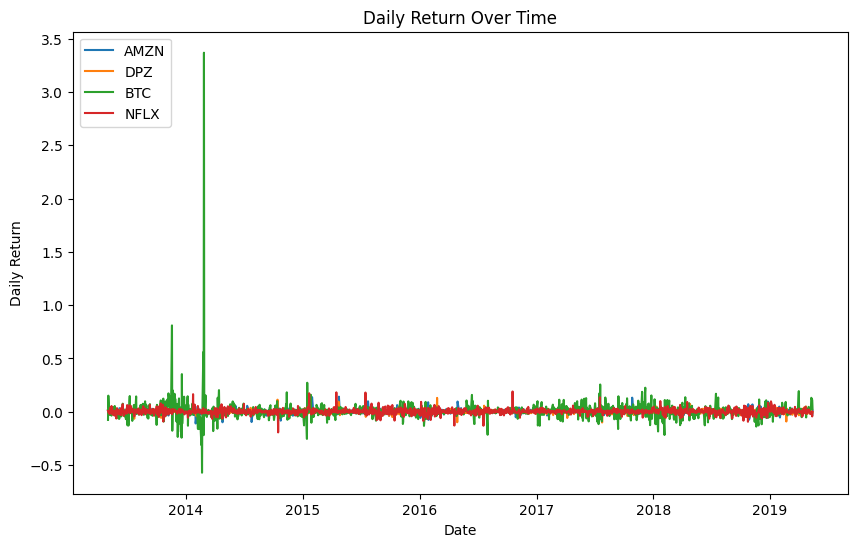

AMZN    0.001499
DPZ     0.001228
BTC     0.005838
NFLX    0.001955
dtype: float64


In [4]:
#2.Daily Return on Average
# Calculate the daily return for each stock
daily_return = data.set_index('Date').pct_change()

# Calculate the average daily return
average_daily_return = daily_return.mean()

# Plot the daily return
plt.figure(figsize=(10,6))
for stock in daily_return.columns:
    plt.plot(daily_return.index, daily_return[stock], label=stock)
plt.title('Daily Return Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend(loc='upper left')
plt.show()

# Print the average daily return values
print(average_daily_return)


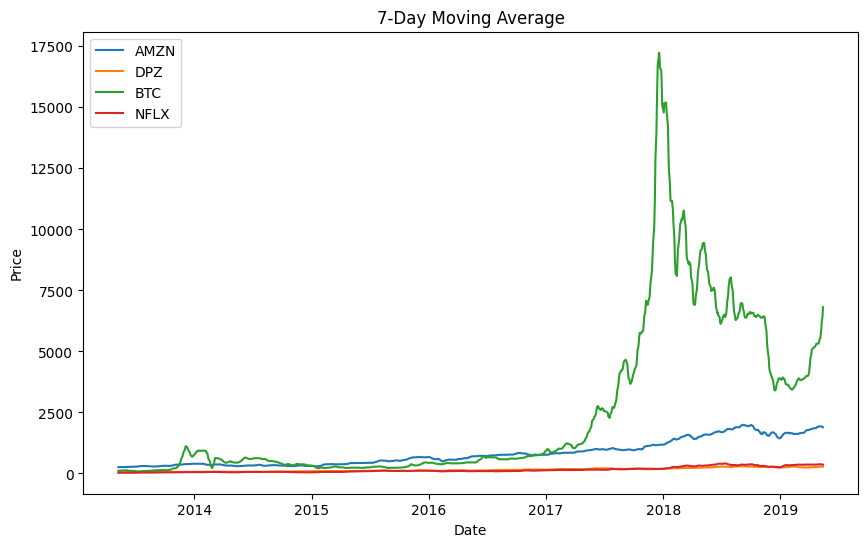

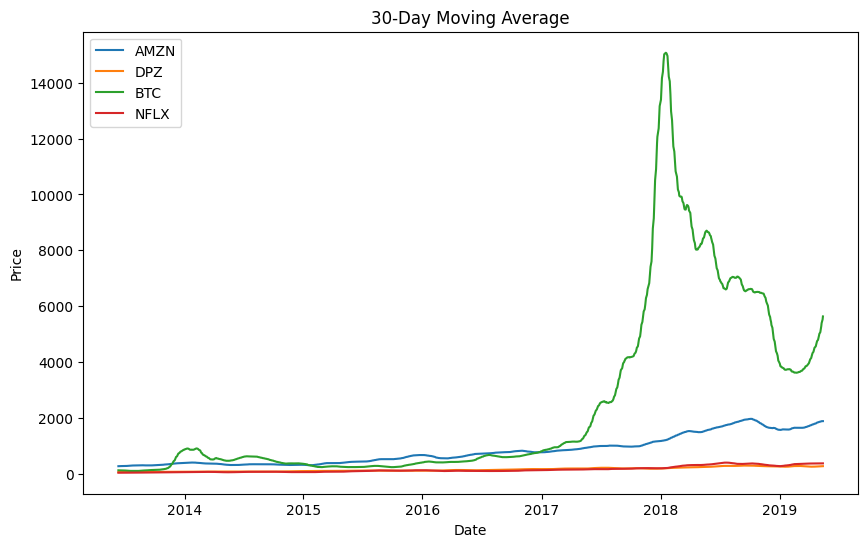

In [5]:
#3. Moving Averages of Stocks (with Graph)
# 7-day and 30-day moving averages for each stock
moving_average_7 = data.set_index('Date').rolling(window=7).mean()
moving_average_30 = data.set_index('Date').rolling(window=30).mean()

# Plot the 7-day moving average
plt.figure(figsize=(10,6))
for stock in moving_average_7.columns:
    plt.plot(moving_average_7.index, moving_average_7[stock], label=stock)
plt.title('7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

# Plot the 30-day moving average
plt.figure(figsize=(10,6))
for stock in moving_average_30.columns:
    plt.plot(moving_average_30.index, moving_average_30[stock], label=stock)
plt.title('30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()


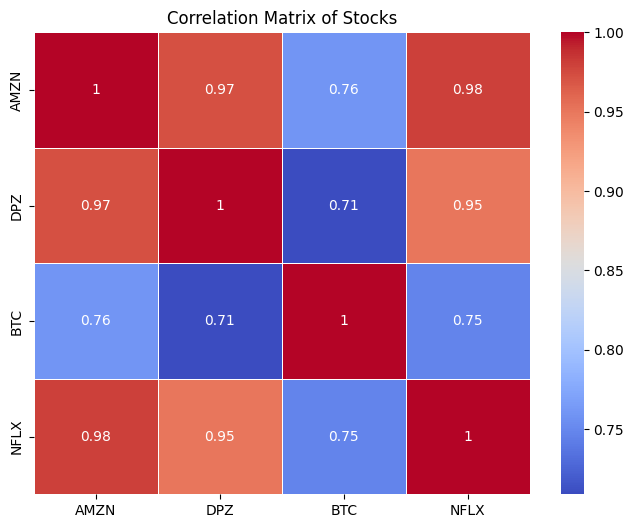

In [6]:
#4. Correlation Between Stocks (with Heatmap)
import seaborn as sns

# Calculate the correlation matrix between stocks
correlation_matrix = data.set_index('Date').corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix of Stocks')
plt.show()


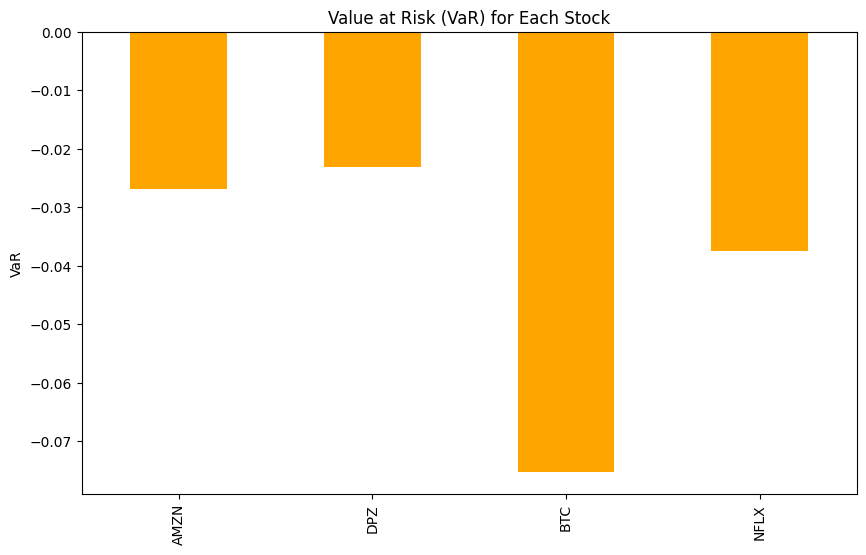

AMZN   -0.026881
DPZ    -0.023058
BTC    -0.075281
NFLX   -0.037486
Name: 0.05, dtype: float64


In [7]:
#5. Value at Risk (VaR) with Graph
import numpy as np

# Assuming 95% confidence level
confidence_level = 0.05

# Calculate daily returns for VaR
daily_return_std = daily_return.std()

# Calculate VaR (quantile-based)
VaR = daily_return.quantile(confidence_level)

# Plot the VaR for each stock
plt.figure(figsize=(10,6))
VaR.plot(kind='bar', color='orange')
plt.title('Value at Risk (VaR) for Each Stock')
plt.ylabel('VaR')
plt.show()

# Print VaR values
print(VaR)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1459/1459 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - loss: 0.0116
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


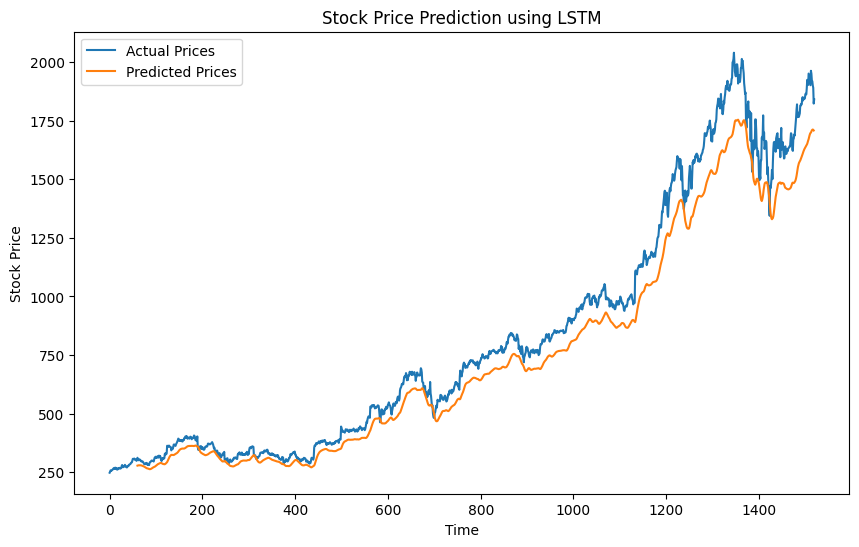

In [12]:
#6. Predicting Stock Behavior with LSTM and Plotting the Prediction vs Actual Prices
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/portfolio_data.csv')

# Preprocessing the data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# For LSTM, use only the stock of interest (e.g., 'AMZN')
prices = data['AMZN'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(prices)

# Prepare the data for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, batch_size=1, epochs=1)

# Use the model for predictions
predictions = model.predict(X)

# Inverse transform to get actual prices
predictions = scaler.inverse_transform(predictions)

# Plot the predictions against actual prices
plt.figure(figsize=(10,6))
plt.plot(prices, label='Actual Prices')
plt.plot(np.arange(time_step, len(predictions) + time_step), predictions, label='Predicted Prices')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.show()
